<a href="https://colab.research.google.com/github/myungjinma/Python_Study/blob/main/0817_69%EC%9D%BC%EC%B0%A8_ML(Recipes%2C_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C_%EC%A0%95%EC%9D%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cp drive/MyDrive/recipes_muffins_cupcakes.csv .

In [6]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
# Allows charts to appear in the notebook
%matplotlib inline
# Pickle package
import pickle

In [5]:
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


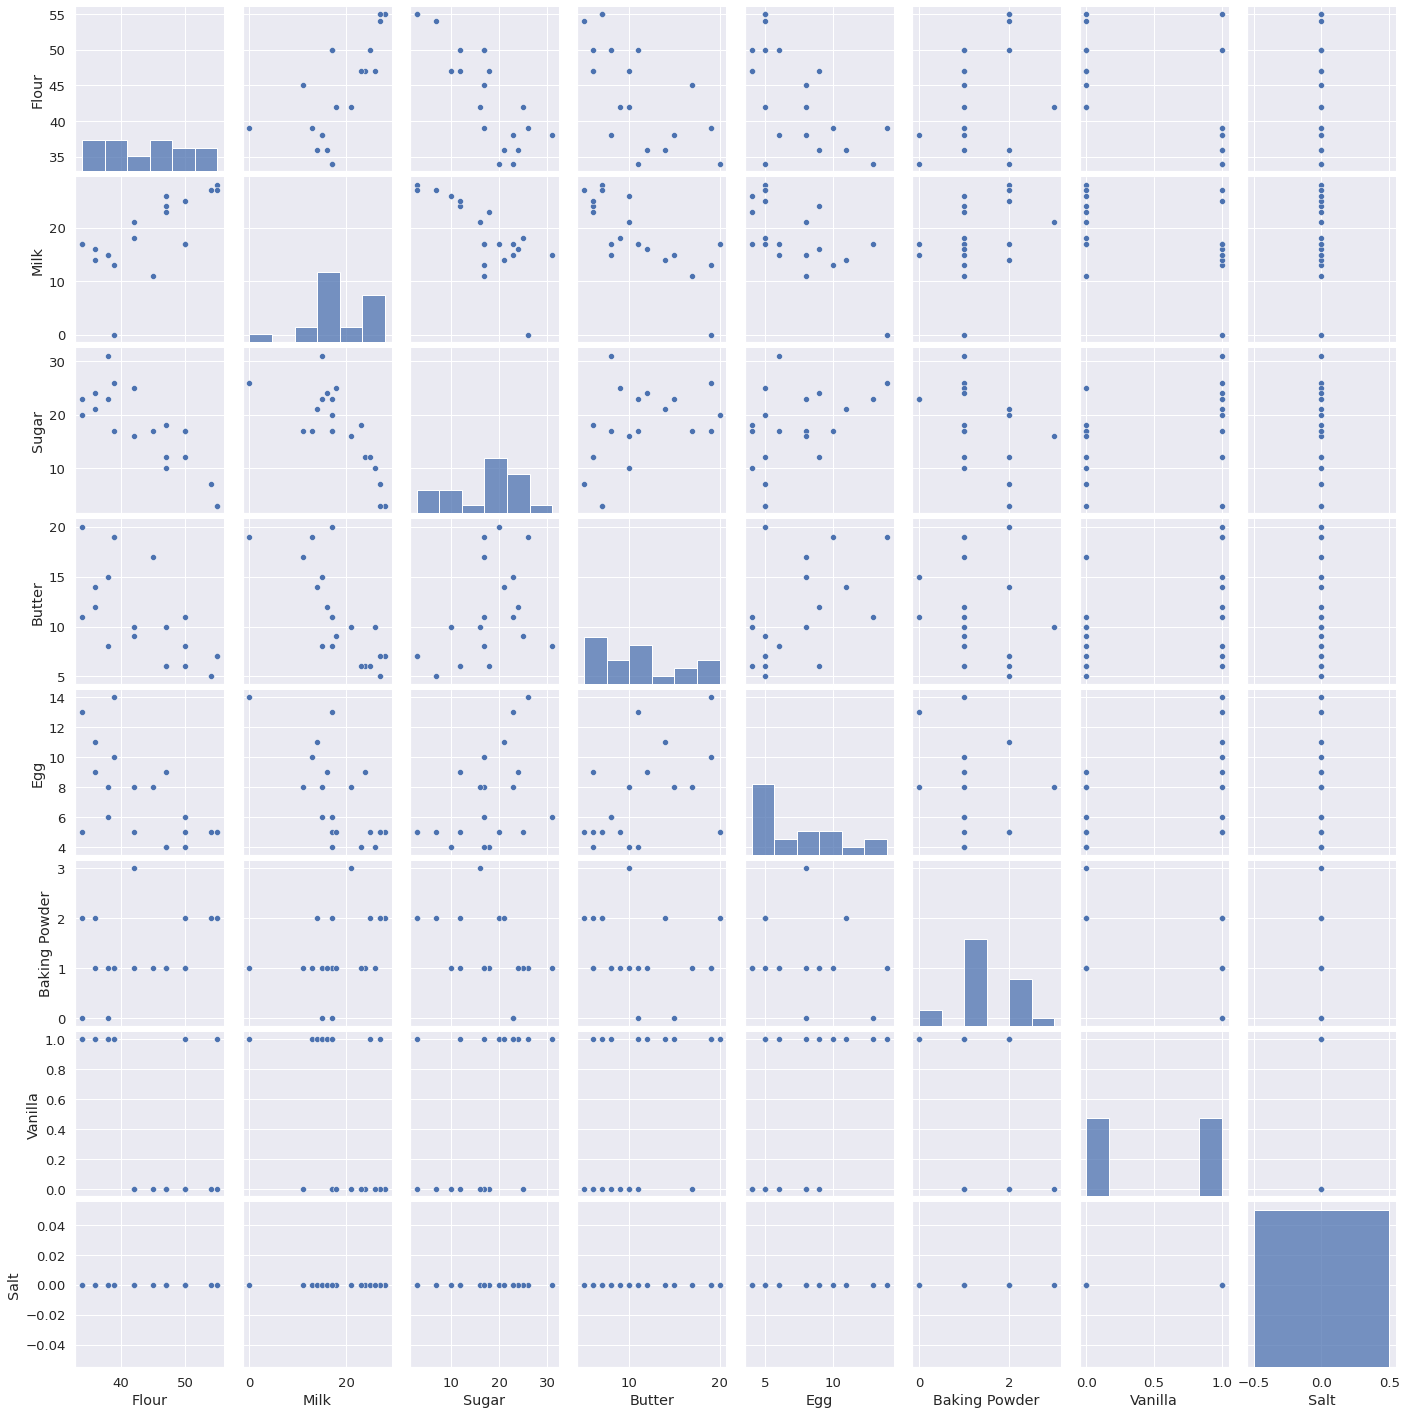

In [7]:
sns.pairplot(recipes)

In [9]:
recipes.corr()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
Flour,1.000000,0.653965,-0.823497,-0.663835,-0.612530,0.333677,-0.584768,NaN
Milk,0.653965,1.000000,-0.756611,-0.773610,-0.677137,0.387600,-0.399741,NaN
Sugar,-0.823497,-0.756611,1.000000,0.449314,0.443047,-0.482146,0.394677,NaN
Butter,-0.663835,-0.773610,0.449314,1.000000,0.511927,-0.194494,0.448743,NaN
Egg,-0.612530,-0.677137,0.443047,0.511927,1.000000,-0.290259,0.475739,NaN
Baking Powder,0.333677,0.387600,-0.482146,-0.194494,-0.290259,1.000000,-0.140028,NaN
Vanilla,-0.584768,-0.399741,0.394677,0.448743,0.475739,-0.140028,1.000000,NaN
Salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


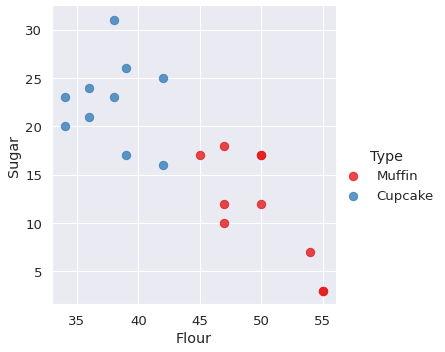

In [8]:
# Plot two ingredients (Flour and Sugar)
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [10]:
X_features = recipes.loc[:,['Flour', 'Sugar']]

In [12]:
y_label = np.where(recipes['Type']=='Muffin', 0,1)

In [13]:
X_features

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12
5,55,3
6,54,7
7,47,10
8,50,17
9,50,17


In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC(kernel = 'linear')

In [17]:
model.fit(X_features, y_label)

SVC(kernel='linear')

In [18]:
model.coef_

array([[-6.66503014e-01, -7.77156117e-16]])

In [23]:
w = model.coef_[0]

In [24]:
w

array([-6.66503014e-01, -7.77156117e-16])

In [25]:
a= -w[0] / w[1]

In [26]:
xx = np.linspace(30, 60)

In [27]:
yy = a*xx - (model.intercept_[0]/ w[1])

In [28]:
model.support_vectors_

array([[45., 17.],
       [42., 16.],
       [42., 25.]])

In [29]:
b= model.support_vectors_[0]

In [30]:
b

array([45., 17.])

y = ax + B

B= y -ax

c = (45, 17)

a = -w[0]/w[1]

c[0] = 45 =x

c[1] = 17 = y

yy_up = a * xx + (y - ax)

a^xx + (c

In [31]:
yy_down = a *xx + (b[1]-a *b[0])

In [32]:
b= model.support_vectors_[-1]

In [33]:
yy_up = a *xx + (b[1]- a *b[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


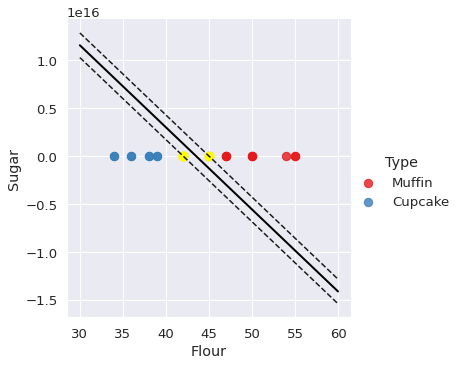

In [36]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue = 'Type', palette='Set1', fit_reg=False, scatter_kws={'s':70})
plt.plot(xx, yy, linewidth=2, color= 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up,'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:,1],
            s=80, facecolor='yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 40.0)

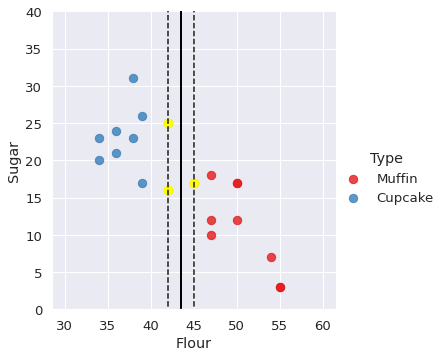

In [37]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue = 'Type', palette='Set1', fit_reg=False, scatter_kws={'s':70})
plt.plot(xx, yy, linewidth=2, color= 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up,'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:,1],
            s=80, facecolor='yellow')
plt.ylim([0,40])

In [38]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour ,sugar):
  if(model.predict([[flour, sugar]]))==0:
    print('You\'re looking at a muffin recipe!')
  else:
    print('You\'re looking at a cupcake recipe!')

In [39]:
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 40.0)

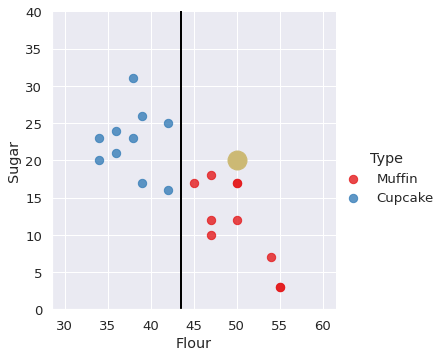

In [40]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue = 'Type', palette='Set1', fit_reg=False, scatter_kws={'s':70})
plt.plot(xx, yy, linewidth=2, color= 'black')
plt.plot(50, 20, 'yo', markersize= '19')
plt.ylim([0,40])

#추천시스템

1. 상품 기반 추천 (Content based filtering) : 비슷한 종류의 상품을 추천해주는 시스템

슈퍼맨 시리즈 영화를 좋아하면 어벤져스 영화 추천 (장르, 평점 고려)

2. 협업 필터링(COllaborative Filtering)

- 다른 사람의 정보를 사용하겠다는 것입니다.

- 사용자 기반 협업 필터링

- 항목 기반 협업 필터링

- 잠재 요인 기반 협업 필터링

3. 사용자 기반 협업 필터링

평점 유사도 기반으로 비슷한 유형의 평점을 가진 사람과 비교하여 추천

4. 항목기반 협업 필터링



5. 잠재 요인 협업 필터링

사용자가 보지 않은 영화에 대해 평점을 예측하여 가장 높은 평점의 영화를 추천


u = user

i = item

p_u = (n_users, n_factors) matrix

q_i = (n_items, n_factors) matrix

In [41]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.8 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633972 sha256=d6288ff1f6e7a1c6ba6ba9eba778b8b4ae9d90ed8eda6fe49b30a2333a9f3f32
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [43]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import dump
from surprise.model_selection import train_test_split
from surprise.dataset import DatasetAutoFolds